In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
mu0 = 4 * np.pi * 1e-7
R = 0.3       # radius (m)   ← correct for ~60 cm bore
L = 1.4       # length (m)   ← approx Siemens Trio bore length
B0 = 3.0      # central field (T)

# Correct on-axis field (normalized then scaled to B0 at center)
def solenoid_field_on_axis(z, R, L, B0):
    za = z + L/2                     # distance to entrance end
    zb = z - L/2                     # distance to exit end
    term_a = za / np.sqrt(R**2 + za**2)
    term_b = zb / np.sqrt(R**2 + zb**2)
    B = 0.5 * (term_a - term_b)      # this gives positive B along +z
    B_center = 0.5 * ( (L/2)/np.sqrt(R**2 + (L/2)**2) * 2 )  # analytic at z=0
    return B / B_center * B0

# Generate z profile
z = np.linspace(-2, 2, 501)          # finer grid for smoothness
Bz = solenoid_field_on_axis(z, R, L, B0)

# force ultra-flat central region like shimmed MRI (imaging FOV ~40-50 cm)
z_center = 0.40                      # flat over ±20 cm (adjust to taste)
mask_flat = np.abs(z) < z_center
Bz_shimmed = Bz.copy()
Bz_shimmed[mask_flat] = B0           # perfect uniformity in central volume

# Gradient analysis field
dBdz = np.gradient(Bz, z)
max_neg_idx = np.argmin(dBdz)   # most negative slope
max_pos_idx = np.argmax(dBdz)   # most positive slope

dBdz_shimmed = np.gradient(Bz_shimmed, z)

# Compute B * dB/dz (T²/m)
B_gradB = Bz * dBdz
B_gradB_shimmed = Bz_shimmed * dBdz_shimmed


SHIM_COLOR='orange'

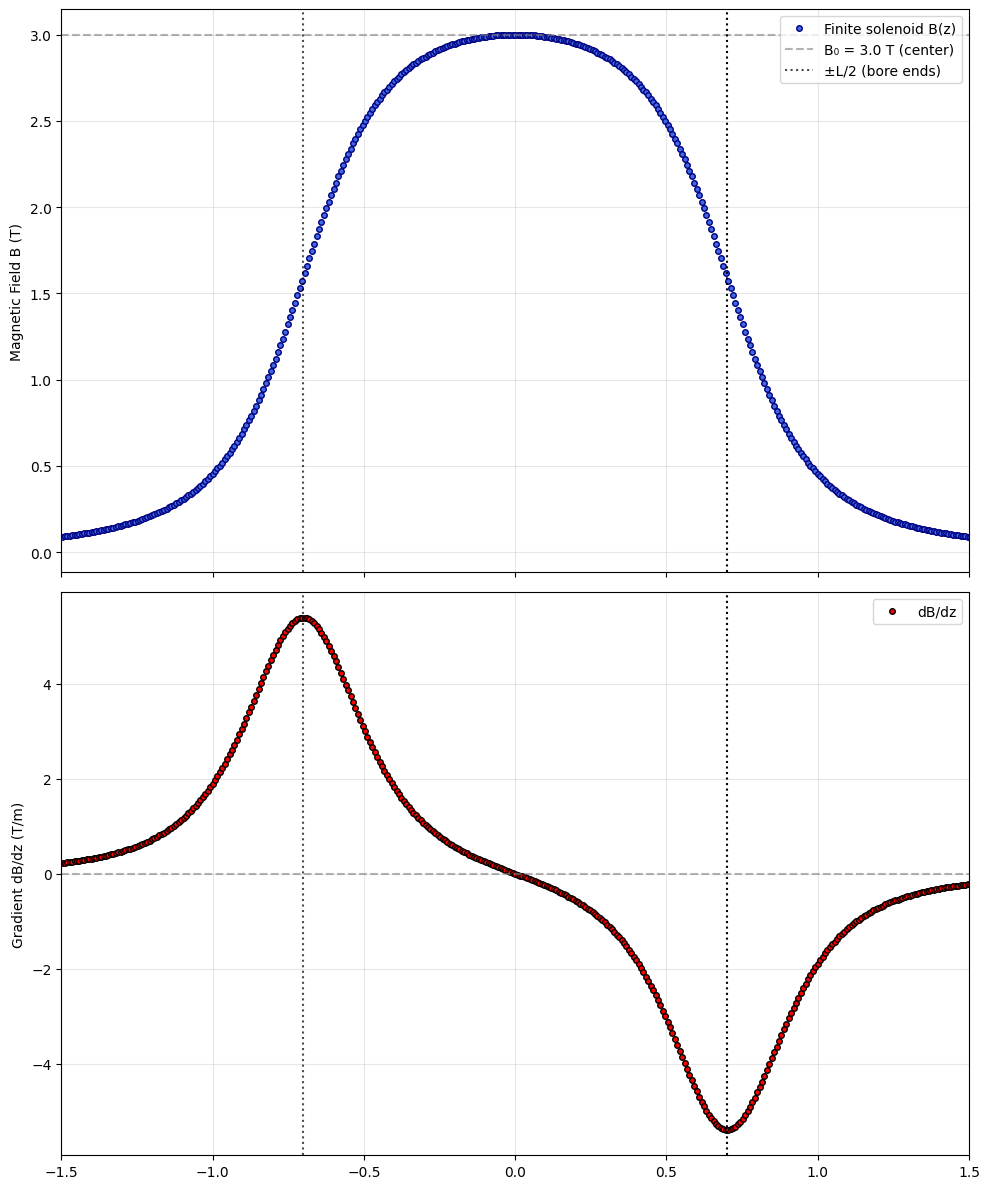

At center (z ≈ 0.000 m):
  B     = 3.000 T
  dB/dz = 0.000 T/m
  B∇B  = 0.000 T²/m

Steepest gradient (|dB/dz| max): 5.39 T/m at z ≈ -0.704 m


In [4]:

# -----------------------------
# Plot 1: B(z), dB/dz, and B×∇B together
# -----------------------------
fig, axs = plt.subplots(2, 1, figsize=(10, 12), sharex=True)

# Plot B(z)
axs[0].plot(z, Bz, 'o', 
            markerfacecolor='royalblue', markeredgecolor='navy', markersize=4, 
            linestyle='none', label='Finite solenoid B(z)')
#axs[0].plot(z, Bz_shimmed, color=SHIM_COLOR, ls='--', lw=1.5, label=f'Shimmed (flat |z| < {z_center} m)')
axs[0].axhline(B0, color='gray', ls='--', alpha=0.6, label=f'B₀ = {B0} T (center)')
axs[0].axvline(-L/2, color='k', ls=':', alpha=0.7, label='±L/2 (bore ends)')
axs[0].axvline(L/2, color='k', ls=':')
axs[0].set_ylabel('Magnetic Field B (T)')
#axs[0].set_title('On-Axis Field Profile – Finite Solenoid (MRI-like)')
axs[0].grid(True, alpha=0.3)
axs[0].legend(loc='upper right')

# Plot gradient dB/dz
axs[1].plot(z, dBdz, 'o', 
            markerfacecolor='red', markeredgecolor='k', markersize=4, 
            linestyle='none', label='dB/dz')
#axs[1].plot(z, dBdz_shimmed, color=SHIM_COLOR, ls='--', lw=1.5, label='Shimmed dB/dz')
axs[1].axvline(-L/2, color='k', ls=':', alpha=0.7)
axs[1].axvline(L/2, color='k', ls=':')
axs[1].axhline(0, color='gray', ls='--', alpha=0.6)
axs[1].set_ylabel('Gradient dB/dz (T/m)')
#axs[1].set_title('Spatial Gradient Along Z-Axis')
axs[1].grid(True, alpha=0.3)
axs[1].legend()

plt.xlim(-1.5, 1.5)
plt.tight_layout()
plt.savefig("FieldMapping.png", dpi=300, bbox_inches='tight')
plt.show()

# Optional: Print some key values
center_idx = len(z) // 2
print(f"At center (z ≈ {z[center_idx]:.3f} m):")
print(f"  B     = {Bz[center_idx]:.3f} T")
print(f"  dB/dz = {dBdz[center_idx]:.3f} T/m")
print(f"  B∇B  = {B_gradB[center_idx]:.3f} T²/m")

# Find approximate locations of max |∇B|
max_grad_idx = np.argmax(np.abs(dBdz))
print(f"\nSteepest gradient (|dB/dz| max): {np.max(np.abs(dBdz)):.2f} T/m "
      f"at z ≈ {z[max_grad_idx]:+.3f} m")

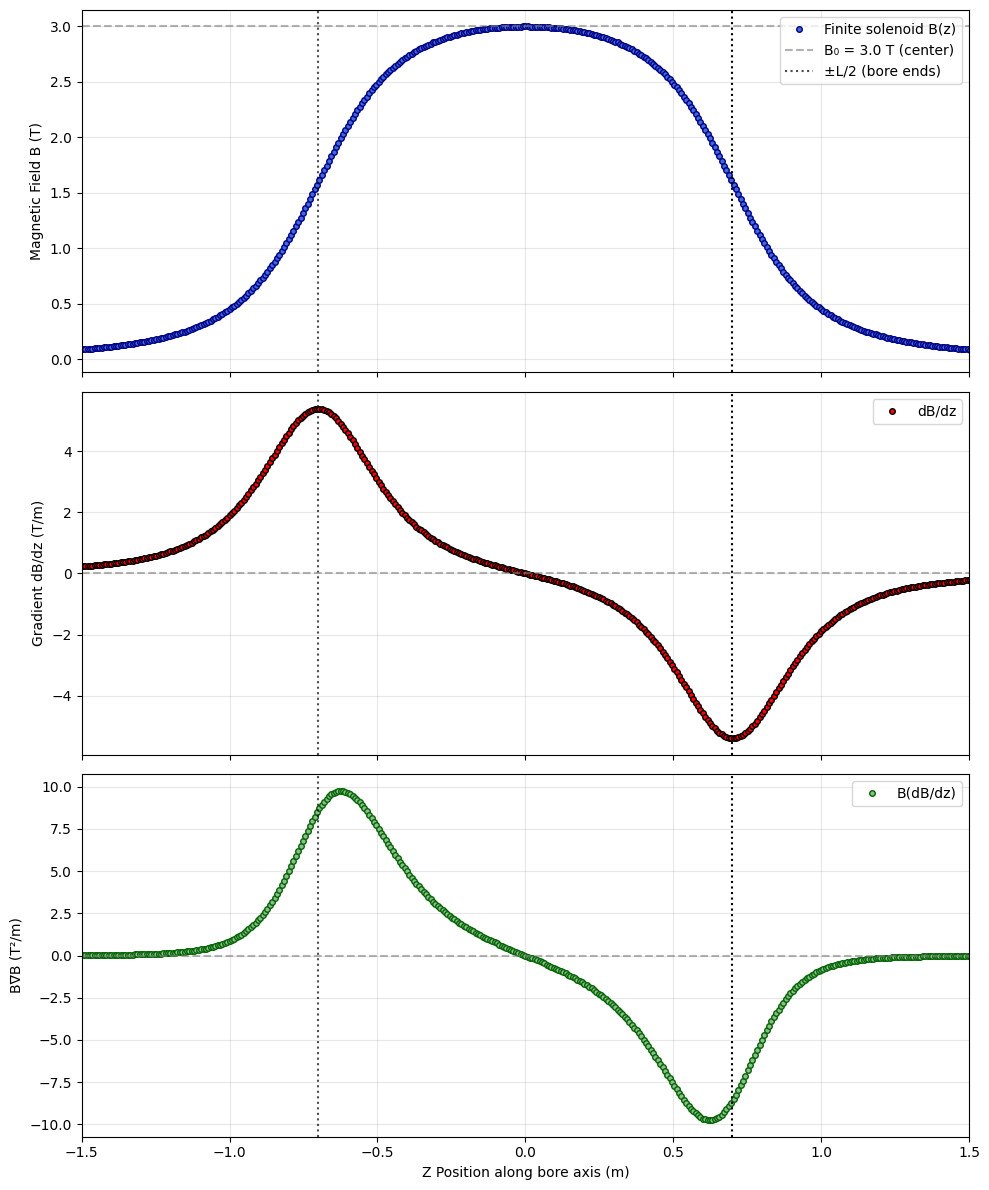

In [5]:

# -----------------------------
# Plot 1: B(z), dB/dz, and B×∇B together
# -----------------------------
fig, axs = plt.subplots(3, 1, figsize=(10, 12), sharex=True)

# Plot B(z)
axs[0].plot(z, Bz, 'o', 
            markerfacecolor='royalblue', markeredgecolor='navy', markersize=4, 
            linestyle='none', label='Finite solenoid B(z)')
#axs[0].plot(z, Bz_shimmed, color=SHIM_COLOR, ls='--', lw=1.5, label=f'Shimmed (flat |z| < {z_center} m)')
axs[0].axhline(B0, color='gray', ls='--', alpha=0.6, label=f'B₀ = {B0} T (center)')
axs[0].axvline(-L/2, color='k', ls=':', alpha=0.7, label='±L/2 (bore ends)')
axs[0].axvline(L/2, color='k', ls=':')
axs[0].set_ylabel('Magnetic Field B (T)')
#axs[0].set_title('On-Axis Field Profile – Finite Solenoid (MRI-like)')
axs[0].grid(True, alpha=0.3)
axs[0].legend(loc='upper right')

# Plot gradient dB/dz
axs[1].plot(z, dBdz, 'o', 
            markerfacecolor='red', markeredgecolor='k', markersize=4, 
            linestyle='none', label='dB/dz')
#axs[1].plot(z, dBdz_shimmed, color=SHIM_COLOR, ls='--', lw=1.5, label='Shimmed dB/dz')
axs[1].axvline(-L/2, color='k', ls=':', alpha=0.7)
axs[1].axvline(L/2, color='k', ls=':')
axs[1].axhline(0, color='gray', ls='--', alpha=0.6)
axs[1].set_ylabel('Gradient dB/dz (T/m)')
#axs[1].set_title('Spatial Gradient Along Z-Axis')
axs[1].grid(True, alpha=0.3)
axs[1].legend()

# Plot B × ∇B
axs[2].plot(z, B_gradB, 'o', 
            markerfacecolor='darkseagreen', markeredgecolor='darkgreen', markersize=4, 
            linestyle='none', label='B(dB/dz)')
#axs[2].plot(z, B_gradB_shimmed, color=SHIM_COLOR, ls='--', lw=1.5, label='Shimmed B(dB/dz)')
axs[2].axvline(-L/2, color='k', ls=':', alpha=0.7)
axs[2].axvline(L/2, color='k', ls=':')
axs[2].axhline(0, color='gray', ls='--', alpha=0.6)
axs[2].set_xlabel('Z Position along bore axis (m)')
axs[2].set_ylabel('B∇B (T²/m)')
#axs[2].set_title('B × ∇B Product')
axs[2].grid(True, alpha=0.3)
axs[2].legend()

plt.xlim(-1.5, 1.5)
plt.tight_layout()
plt.savefig("FieldMappingProd.png", dpi=300, bbox_inches='tight')
plt.show()